In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [20]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [21]:
# create base
Base = automap_base()

In [22]:
engine.table_names()

['measurement', 'station']

In [23]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [24]:
# reflect an existing database into a new model
data = pd.read_sql("SELECT * FROM measurement", conn)
# reflect the tables
measurement_df = pd.read_sql_table("measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [25]:
# reflect an existing database into a new model
data = pd.read_sql("SELECT * FROM station", conn)
# reflect the tables
station_df = pd.read_sql_table("station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement_base = Base.classes.measurement
station_base = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
#Identify the first row values for columns and example of data points
first_row = session.query(measurement_base).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2ac424a90>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [37]:
# Find the most recent date in the data set.
# Utilized max funtion to identify the most recent date.
last = session.query(measurement_base.date, func.max(measurement_base.date)).first()
print(last)

('2017-08-23', '2017-08-23')


In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation_data = session.query(measurement_base.date, measurement_base.prcp)\
                                  .filter(measurement_base.date > '2016-08-23').all()
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
#precipitation_df.head()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement_base.date, measurement_base.prcp).filter(measurement_base.date >= query_date).all()


#Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
#precipitation_df

# Sort the dataframe by date
precipitation_df.sort_values("Date")
precipitation_df



Query Date:  2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


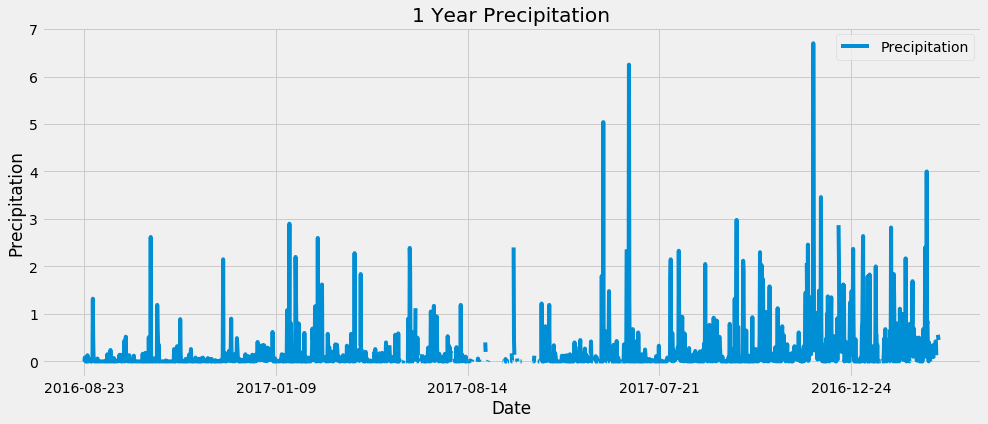

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('1 Year Precipitation')
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
session.query(station_base).count()

9

In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement_base.station, func.count(measurement_base.station))\
.group_by(measurement_base.station).order_by(func.count(measurement_base.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement_base.tobs),func.max(measurement_base.tobs),func.avg(measurement_base.tobs))\
.filter(measurement_base.station == 'USC00519281').first()

(54.0, 85.0, 71.66378066378067)

In [62]:
query_date

datetime.date(2016, 8, 23)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ad934828>]],
      dtype=object)

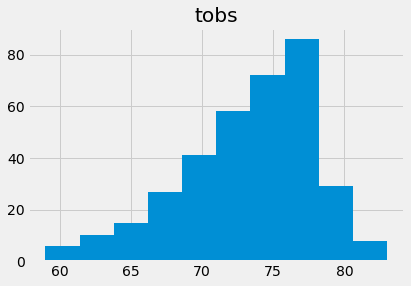

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(measurement_base.tobs).filter((measurement_base.station == 'USC00519281')\
                                            &(measurement_base.date >= query_date)).all()
pd.DataFrame(result).hist()

# Close session

In [ ]:
# Close Session
session.close()